<a href="https://colab.research.google.com/github/Shaurya0108/cs4372/blob/main/Financial_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import All the Libraries

In [1]:
!pip install mplfinance
!pip install yfinance
!pip install git+https://github.com/kernc/backtesting.py.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 4.0 MB/s eta 0:00:00
  Cloning https://github.com/kernc/backtesting.py.git to /tmp/pip-req-build-507vq0_9
  Running command git clone --filter=blob:none --quiet https://github.com/kernc/backtesting.py.git /tmp/pip-req-build-507vq0_9
  Resolved https://github.com/kernc/backtesting.py.git to commit 0ce24d80b1bcb8120d95d31dc3bb351b1052a27d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for Backtesting: filename=Backtesting-0.3.4.dev30+g0ce24d8-py3-none-any.whl size=175111 sha256=aabe43622ada9bfa34d522d87ed76f4c76cbd5f89bd9d3fb31e09e15d0aea993
  Stored in directory: /tmp/pip-ephem-wheel-cache-1_vgr5e_/wheels/56/8f/2e/0a677fd9f9f793d59eae94d71a79ea11331cdcfce0c2e73f3e
Successfully built Backtesting


In [2]:
# Uncomment the lines below to install talib on Google Colab
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr --silent
!make --silent
!make install --silent
!pip install Ta-Lib
import talib

--2024-11-20 01:48:17--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 104.18.12.149, 104.18.13.149, 2606:4700::6812:d95, ...
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|104.18.12.149|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-11-20 01:48:17--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 104.18.12.149, 104.18.13.149, 2606:4700::6812:d95, ...
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://onboardcloud.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-11-20 01:48:17--  http://onboardcloud

In [3]:
from datetime import datetime, timedelta
import pandas as pd
import yfinance as yf
import mplfinance as mpf
from datetime import datetime, timedelta
import mplfinance as mpf
import talib as talib
import seaborn as sns

# Get the Data

In [4]:
ticker_symbol = 'NVDA'

df = yf.download(ticker_symbol, start='2023-01-01' )

[*********************100%***********************]  1 of 1 completed


In [5]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2024-11-13 00:00:00+00:00,146.270004,146.270004,149.330002,145.899994,149.070007,191903300
2024-11-14 00:00:00+00:00,146.759995,146.759995,149.000000,145.550003,147.639999,194463300
2024-11-15 00:00:00+00:00,141.979996,141.979996,145.240005,140.080002,144.869995,250132900
2024-11-18 00:00:00+00:00,140.149994,140.149994,141.550003,137.149994,139.500000,221866000
2024-11-19 00:00:00+00:00,147.009995,147.009995,147.130005,140.990005,141.324997,223234132


# Data Analysis

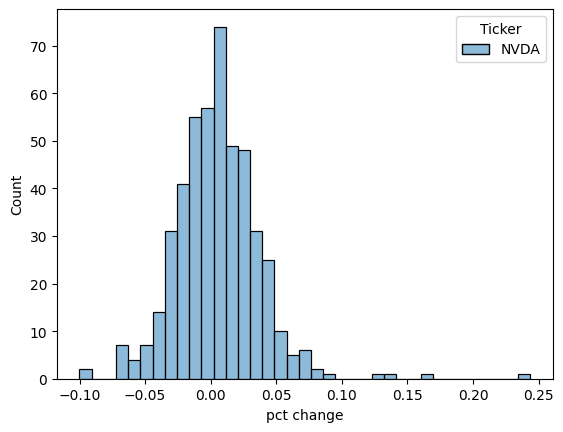

In [6]:
import matplotlib.pyplot as plt

ax = sns.histplot(df['Close'].pct_change())
ax.set(xlabel="pct change")
plt.show()

In [7]:
ticker_symbol = 'AAPL'

df = yf.download(ticker_symbol, start='2015-01-01')
start_yr = df.groupby(df.index.year).first()['Close']
end_yr = df.groupby(df.index.year).last()['Close']

annual_returns = (end_yr-start_yr)/start_yr

annual_returns


[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2015,-0.037227
2016,0.099383
2017,0.456995
2018,-0.084291
2019,0.859486
2020,0.767138
2021,0.372151
2022,-0.286138
2023,0.539378


<Axes: xlabel='Date', ylabel='AAPL'>

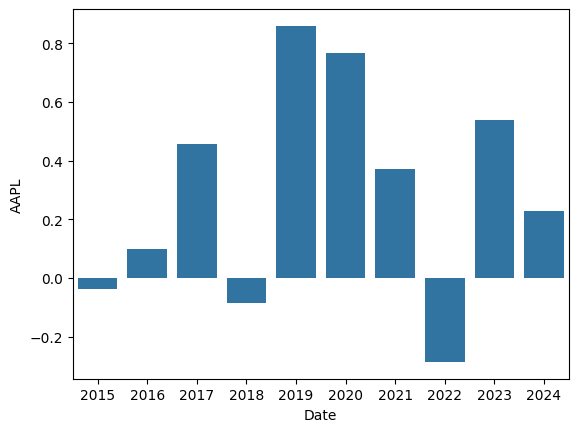

In [8]:
sns.barplot(annual_returns, x ="Date", y ="AAPL")

# Plotting and Charting

In [9]:
ticker_symbol = 'NVDA'

# df = yf.download(ticker_symbol, start='2023-01-01')

In [10]:
df = yf.Ticker(ticker_symbol).history(start="2023-01-01")

In [11]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,14.841228,14.986133,14.086724,14.305580,401277000,0.0,0.0
2023-01-04 00:00:00-05:00,14.557416,14.843227,14.231630,14.739295,431324000,0.0,0.0
2023-01-05 00:00:00-05:00,14.481465,14.554417,14.138691,14.255614,389168000,0.0,0.0
2023-01-06 00:00:00-05:00,14.464475,15.000123,14.024765,14.849222,405044000,0.0,0.0
2023-01-09 00:00:00-05:00,15.273944,16.045436,15.131038,15.617718,504231000,0.0,0.0


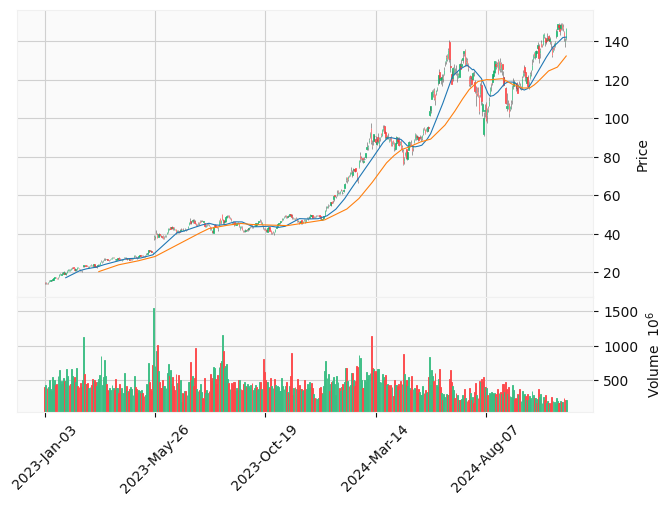

In [12]:
mpf.plot(df,type='candle',style='yahoo',volume=True, mav=(20, 50))

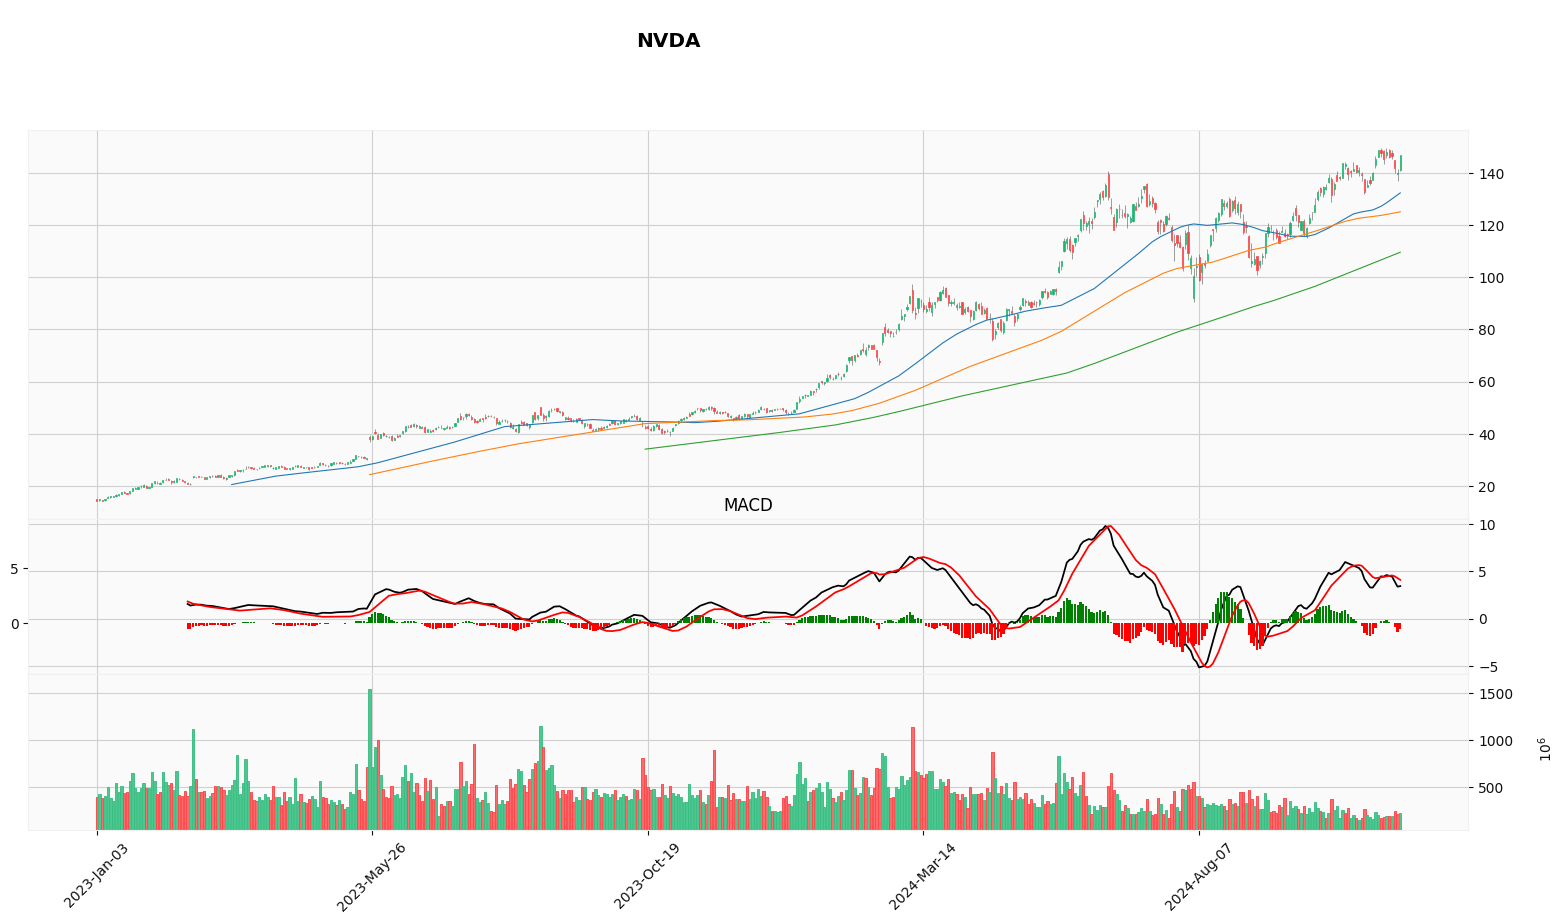

In [13]:
df["macd"], df["macd_signal"], df["macd_hist"] = talib.MACD(df['Close'])
# macd panel
colors = ['g' if v >= 0 else 'r' for v in df["macd_hist"]]
macd_plot = mpf.make_addplot(df["macd"], panel=1, color='black', title="MACD")
macd_hist_plot = mpf.make_addplot(df["macd_hist"], type='bar', panel=1, color=colors) # color='dimgray'
macd_signal_plot = mpf.make_addplot(df["macd_signal"], panel=1, color='red')
# plot
plots = [macd_plot, macd_signal_plot, macd_hist_plot]
mpf.plot(df, type='candle', style='yahoo', mav=(50,100,200), addplot=plots, title=f"\n{ticker_symbol}", volume=True, volume_panel=2, ylabel='', ylabel_lower='', figsize=(20,10))

## Bollinger Bands

(<Figure size 1600x1150 with 4 Axes>,
 [<Axes: ylabel='Price'>,
  <Axes: >,
  <Axes: ylabel='Volume  $10^{6}$'>,
  <Axes: >])

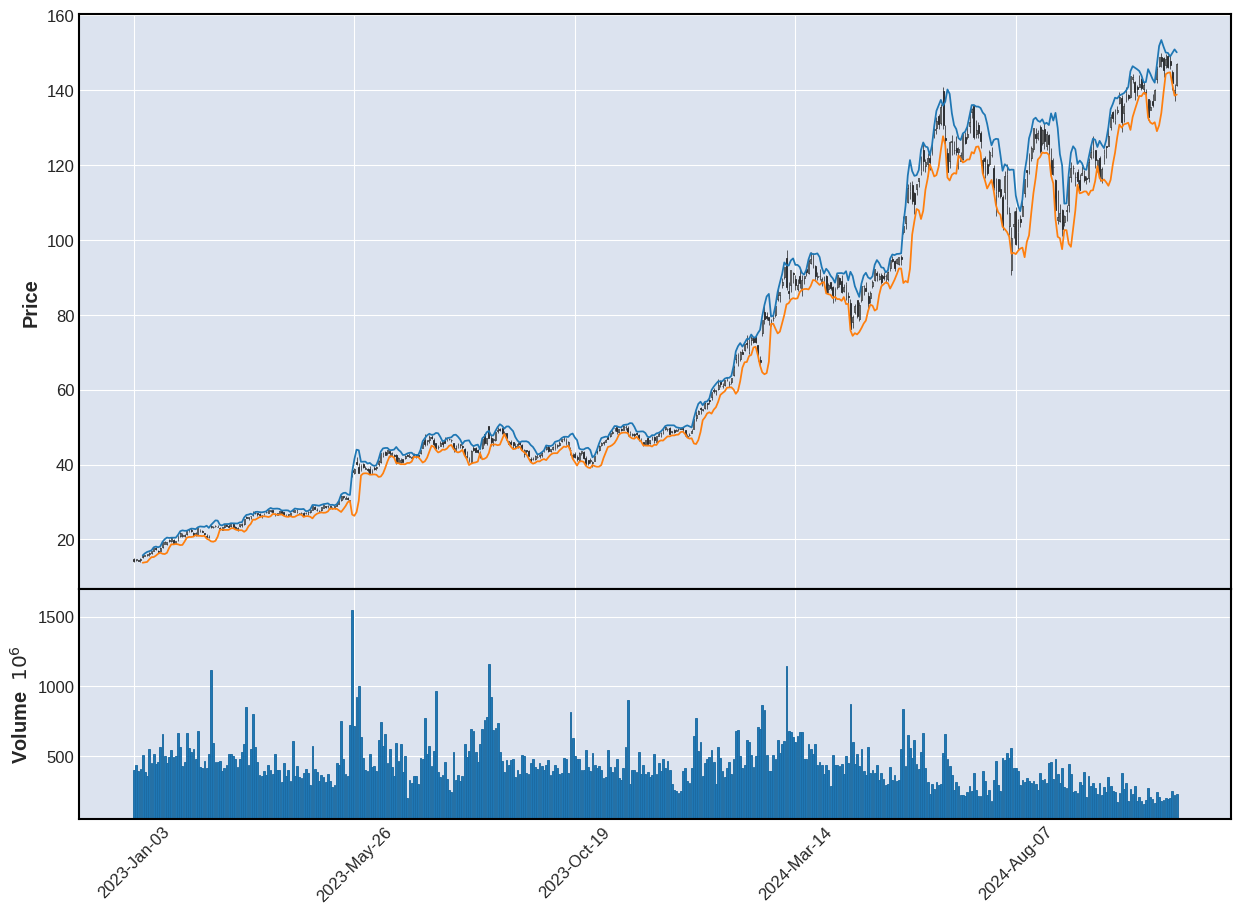

In [14]:
# Calculate Bollinger Band
df["upperband"], df["middleband"], df["lowerband"] = talib.BBANDS(df["Close"], timeperiod=5,
                                                                      nbdevup=2, nbdevdn=2, matype=0)
    # Prune data to last 30 values
#df = df[-30:]


# Place Upper and Lower Bollinger Band in Upper Panel
mpfBB = mpf.make_addplot(df[["upperband", "lowerband"]])

    # List of added Plots
addedPlots = [mpfBB]

# Generate the plots and and return the figure
mpf.plot(df, type='candlestick', volume=True, returnfig=True, addplot=addedPlots, figscale=2.0)


## RSI Plot

(<Figure size 1600x1150 with 6 Axes>,
 [<Axes: ylabel='Price'>,
  <Axes: >,
  <Axes: ylabel='RSI'>,
  <Axes: >,
  <Axes: ylabel='Volume  $10^{6}$'>,
  <Axes: >])

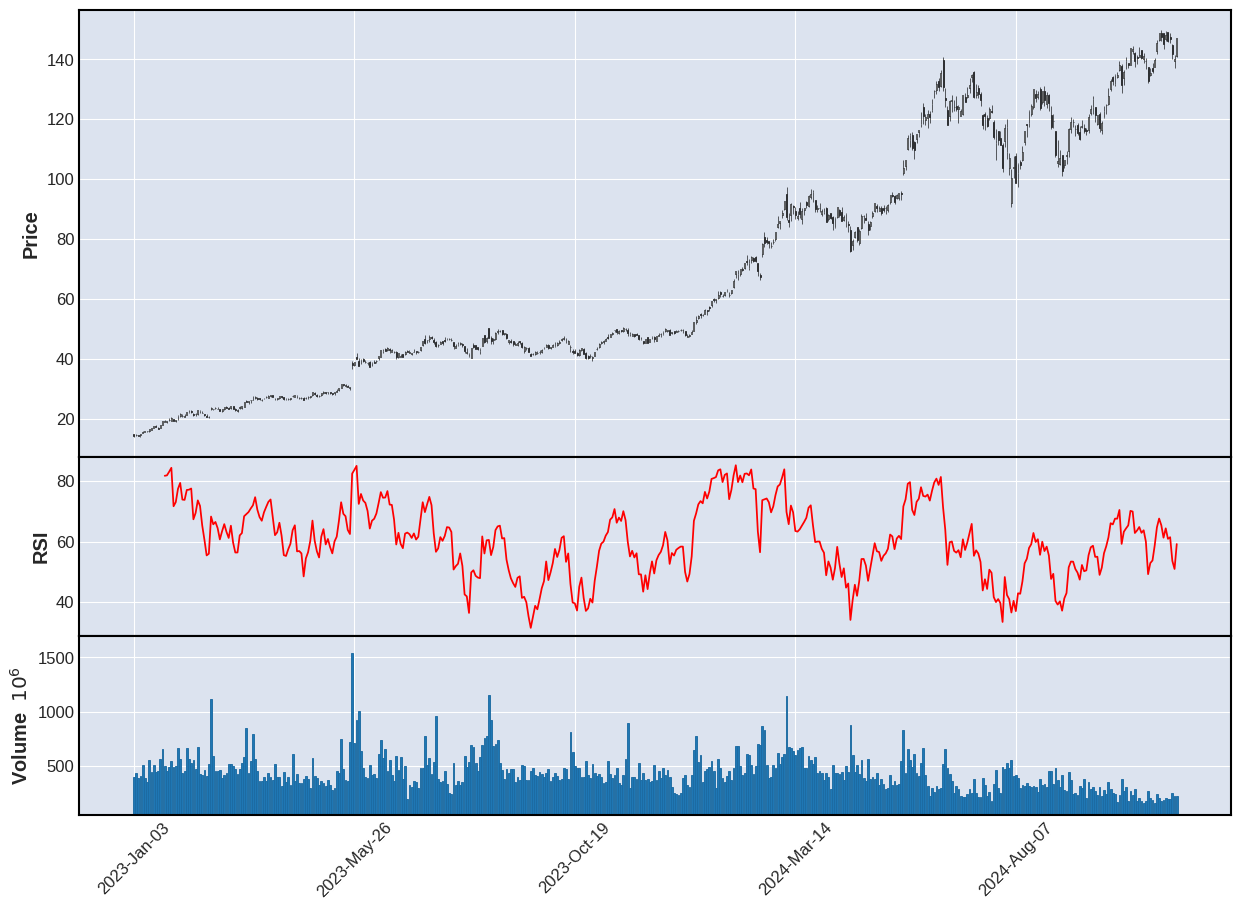

In [15]:
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)


apds = [
    mpf.make_addplot(df['RSI'], ylabel='RSI', panel=1, color="red"),
]


# Generate the plots and and return the figure
mpf.plot(df, type='candlestick', volume=True, returnfig=True, addplot=apds, figscale=2.0, volume_panel = 2)


In [16]:
# Backtesting

Using Backtesting library

In [17]:

from backtesting import Backtest, Strategy
from backtesting.test import SMA, GOOG
from backtesting.test import SMA
from backtesting.lib import crossover
import pandas as pd

class SmaCross(Strategy):
    n1 = 20 # period of the first SMA
    n2 = 50 # period of the second SMA

    def init(self):
        close = self.data.Close # close price data
        self.sma1 = self.I(SMA, close, self.n1)
        self.sma2 = self.I(SMA, close, self.n2)

    def next(self):
      if crossover(self.sma1, self.sma2):
          self.buy()
      elif crossover(self.sma2, self.sma1):
          self.sell()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '
/usr/local/lib/python3.10/dist-packages/backtesting/test/__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
/usr/local/lib/python3.10/dist-packages/backtesting/test/__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-cons

In [18]:
from backtesting import Backtest

bt = Backtest(df, SmaCross,
              cash=10000, commission=.002,
              exclusive_orders=True)

output = bt.run()
bt.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:455: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = (df.assign(_width=1).set_index('datetime')


GridPlot(id='p1338', ...)

In [19]:
print(output)

Start                     2023-01-03 00:00...
End                       2024-11-19 00:00...
Duration                    686 days 00:00:00
Exposure Time [%]                   60.970464
Equity Final [$]                 14058.480697
Equity Peak [$]                  19252.244586
Return [%]                          40.584807
Buy & Hold Return [%]              927.640914
Return (Ann.) [%]                   19.853519
Volatility (Ann.) [%]                60.05495
Sharpe Ratio                         0.330589
Sortino Ratio                        0.627704
Calmar Ratio                         0.329718
Max. Drawdown [%]                   -60.21362
Avg. Drawdown [%]                   -9.764863
Max. Drawdown Duration      155 days 00:00:00
Avg. Drawdown Duration       27 days 00:00:00
# Trades                                    8
Win Rate [%]                             37.5
Best Trade [%]                      74.446122
Worst Trade [%]                      -14.8765
Avg. Trade [%]                    

In [20]:


from backtesting import Backtest, Strategy
from backtesting.test import SMA, GOOG
from backtesting.test import SMA
from backtesting.lib import crossover
from talib import EMA

import pandas as pd

class EmaCross(Strategy):
    n1 = 8 # period of the first SMA
    n2 = 20 # period of the second SMA

    def init(self):
        close = self.data.Close # close price data
        self.ema1 = self.I(EMA, close, self.n1)
        self.ema2 = self.I(EMA, close, self.n2)

    def next(self):
      if crossover(self.ema1, self.ema2):
          self.buy()
      elif crossover(self.ema2, self.ema1):
          self.sell()

In [21]:
from backtesting import Backtest

bt = Backtest(df, EmaCross,
              cash=10000, commission=.002,
              exclusive_orders=True)

output = bt.run()
bt.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:455: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = (df.assign(_width=1).set_index('datetime')


GridPlot(id='p1706', ...)

In [22]:
print(output)

Start                     2023-01-03 00:00...
End                       2024-11-19 00:00...
Duration                    686 days 00:00:00
Exposure Time [%]                    68.14346
Equity Final [$]                 13965.156153
Equity Peak [$]                  17898.440635
Return [%]                          39.651562
Buy & Hold Return [%]              927.640914
Return (Ann.) [%]                   19.429869
Volatility (Ann.) [%]               50.264721
Sharpe Ratio                         0.386551
Sortino Ratio                        0.714845
Calmar Ratio                         0.521887
Max. Drawdown [%]                  -37.230042
Avg. Drawdown [%]                   -9.985861
Max. Drawdown Duration      183 days 00:00:00
Avg. Drawdown Duration       32 days 00:00:00
# Trades                                   16
Win Rate [%]                             25.0
Best Trade [%]                      80.305036
Worst Trade [%]                    -14.400998
Avg. Trade [%]                    

In [23]:
def MACD(close, n1, n2, ns):
    #n1-n2
    macd, macdsignal, macdhist = talib.MACD(close, fastperiod=n1, slowperiod=n2, signalperiod=ns)
    return macd, macdsignal

class MACDCross(Strategy):
    n1 = 12
    n2 = 26
    ns = 9

    def init(self):
        self.macd, self.macdsignal = self.I(MACD, self.data.Close, self.n1, self.n2, self.ns)

    def next(self):
        if crossover(self.macd, self.macdsignal):
            self.buy()
        elif crossover(self.macdsignal, self.macd):
            self.position.close()

In [24]:
bt = Backtest(df, MACDCross, cash=10000, commission=.002)
stats = bt.run()
bt.plot()


/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:455: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = (df.assign(_width=1).set_index('datetime')


GridPlot(id='p2112', ...)

In [25]:
stats

,0
Start,2023-01-03 00:00:00-05:00
End,2024-11-19 00:00:00-05:00
Duration,686 days 00:00:00
Exposure Time [%],52.320675
Equity Final [$],26899.900584
Equity Peak [$],30819.527065
Return [%],168.999006
Buy & Hold Return [%],927.640914
Return (Ann.) [%],69.229099
Volatility (Ann.) [%],58.886989


In [26]:
print(stats['_trades'].to_string())

    Size  EntryBar  ExitBar  EntryPrice   ExitPrice          PnL  ReturnPct                 EntryTime                  ExitTime   Tag         Duration
0    389        52       65   25.653700   26.571022   356.838199   0.035758 2023-03-20 00:00:00-04:00 2023-04-06 00:00:00-04:00  None 17 days 00:00:00
1    371        83       84   27.882060   27.637497   -90.732670  -0.008771 2023-05-03 00:00:00-04:00 2023-05-04 00:00:00-04:00  None  1 days 00:00:00
2    359        86       91   28.565090   28.494081   -25.492108  -0.002486 2023-05-08 00:00:00-04:00 2023-05-15 00:00:00-04:00  None  7 days 00:00:00
3    345        93      119   29.628696   42.444658  4421.506845   0.432552 2023-05-17 00:00:00-04:00 2023-06-26 00:00:00-04:00  None 40 days 00:00:00
4    316       133      138   46.363734   44.713787  -521.383343  -0.035587 2023-07-17 00:00:00-04:00 2023-07-24 00:00:00-04:00  None  7 days 00:00:00
5    307       160      171   45.940051   45.928107    -3.666925  -0.000260 2023-08-23 00:00:0